In [7]:
import numpy as np
import pandas as pd
import random
from math import log
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
class data():
    def __init__(self):
        x = []
        y = []

        X = []
        
        x = (0.43217701, -1.04835284, -0.35156109, -1.9758633, -0.10499004, 0.0760553, -1.98652679, 0.8862643, -0.29848799, -0.14560078)
        X = np.array(x)
        X = X.reshape(-1, 1)
        
        y = (-152.66131285, 46.56970258, -103.22573994, 50.57480241, -88.07841405, -78.45401149, 40.89066563, 187.66455118, -95.35144145, -52.79507708)
        y = np.array(y)
        y = y.reshape(-1, 1)
        
    def step(self):
        x = np.random.random_sample(size = 10)
        y = [random.randint(-50, 50) for i in range(10)]
        X = []
        
        x = np.array(x)
        y = np.array(y)
        
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)
        
        X.append(x)
        y.append(y)

In [11]:
class model_func():
    
    def __init__(self, num_iterations): 
        
        num_params_list = []
        aic_list = []
        bic_list = []
        
        self.data = data
        
        self.time = 0
        
        self.num_iterations = num_iterations

    # calculate aic for regression
    def calculate_aic(self, n, mse, num_params):
        aic = n * log(mse) + 2 * num_params
        return aic
 
    # calculate bic for regression
    def calculate_bic(self, n, mse, num_params):
        bic = n * log(mse) + num_params * log(n)
        return bic
    
    def regression(self):
        X = self.data.X
        y = self.data.y
        # define and fit the model on all data
        model = LinearRegression().fit(X, y)
        num_params = len(model.coef_) + 1
        num_params_list.append(num_params)
        print('Number of parameters: %d' % (num_params))
        # predict the training set
        yhat = model.predict(X)
        # calculate the error
        mse = mean_squared_error(y, yhat)
        print('MSE: %.3f' % mse)
        # calculate the aic
        aic = calculate_aic(len(y), mse, num_params)
        aic_list.append(aic)
        print('AIC: %.3f' % aic)
        # calculate the bic
        bic = calculate_bic(len(y), mse, num_params)
        bic_list.append(bic)
        print('BIC: %.3f' % bic)

    def step(self):
        
        
        self.regression()
        self.calculate_aic()
        self.calculate_bic()
        
        self.data.step(X)
        
        self.time += 1
        
        
    def run(self):
        for t in range(self.num_iterations):
            self.step()
        


In [12]:
reg = model_func(num_iterations = 10)
reg.run()

AttributeError: type object 'data' has no attribute 'X'

In [43]:
print( y)

[[-152.66131285]
 [  46.56970258]
 [-103.22573994]
 [  50.57480241]
 [ -88.07841405]
 [ -78.45401149]
 [  40.89066563]
 [ 187.66455118]
 [ -95.35144145]
 [ -52.79507708]]


In [44]:
df = pd.DataFrame(list(zip(num_params_list, aic_list, bic_list)), columns =['Number of Parameters', 'AIC', 'BIC'])
print(df)

   Number of Parameters        AIC        BIC
0                     2  95.274505  95.879676


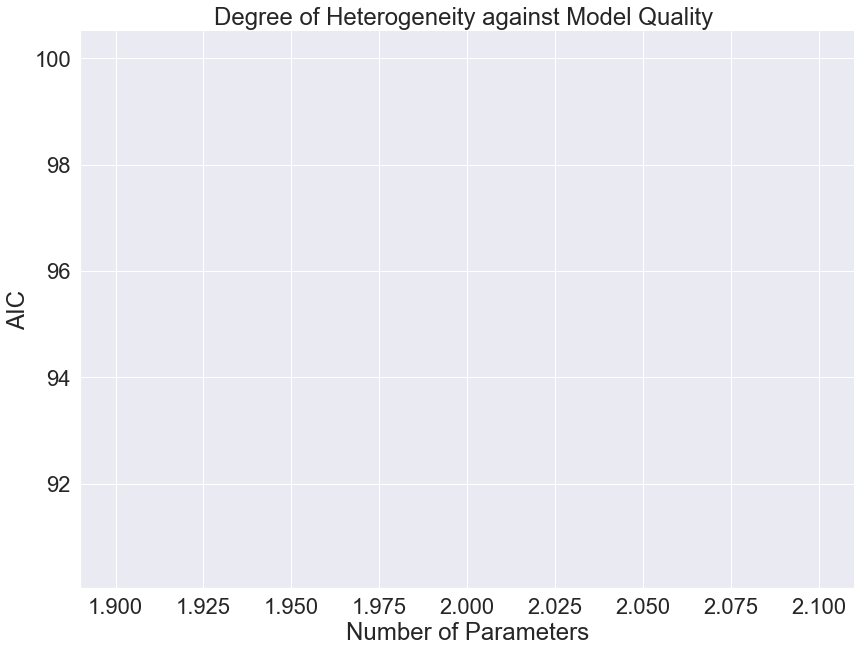

In [45]:
sns.set(font_scale=2)
figure = sns.relplot(data=df, x="Number of Parameters", y="AIC", kind='line')
plt.title('Degree of Heterogeneity against Model Quality ')
figure.fig.set_size_inches(15,10)
figure.savefig("output.png")